In [8]:
import numpy as np
import pandas as pd
import itertools

import matplotlib.pyplot as plt

# Training dataset

In [9]:
df = pd.read_csv('../../data/pp_4l_all.csv')
cols_cont = [
    'E1', 'p1x', 'p1y', 'p1z', 
    'E2', 'p2x', 'p2y', 'p2z',
    'E3', 'p3x', 'p3y', 'p3z',
    'E4', 'p4x', 'p4y', 'p4z', 
]
cols_cat = ['pdg1', 'pdg2', 'pdg3', 'pdg4']

df['schema'] = df[cols_cat].groupby(by=cols_cat).ngroup().values

In [10]:
df.head()

,pdg1,E1,p1x,p1y,p1z,pdg2,E2,p2x,p2y,p2z,...,E3,p3x,p3y,p3z,pdg4,E4,p4x,p4y,p4z,schema
0,11,20.274241,13.753708,1.397849,14.829915,-11,13.459523,-13.458053,-0.178631,0.087476,...,10.726935,1.457106,-9.715445,-4.306151,-13,19.941356,-1.752761,8.496227,17.955180,1
1,13,152.820099,63.584427,18.996694,-137.659427,-13,164.917905,4.471840,31.646155,-161.791309,...,137.529487,-39.586901,-44.338982,-124.021291,-13,39.559938,-28.469366,-6.303867,-26.734509,2
2,11,51.267102,27.995380,26.039697,34.154190,-11,43.013595,-7.827488,-17.337374,-38.578689,...,123.210062,0.378806,-41.833551,115.890116,-13,46.883635,-20.546697,33.131228,26.042638,1
3,13,64.805282,-3.653628,46.355274,45.139262,-13,38.158727,-29.094263,-15.298609,-19.379208,...,57.805237,34.629435,10.578369,45.059234,-13,42.993259,-1.881544,-41.635034,10.554281,2
4,13,25.501529,17.607195,-7.617831,-16.800957,-13,22.270427,3.366801,16.786119,-14.242599,...,36.269401,-21.935459,13.187325,-25.698023,-13,47.012227,0.961463,-22.355613,-41.345380,2


In [11]:
df.columns

Index(['pdg1', 'E1', 'p1x', 'p1y', 'p1z', 'pdg2', 'E2', 'p2x', 'p2y', 'p2z',
       'pdg3', 'E3', 'p3x', 'p3y', 'p3z', 'pdg4', 'E4', 'p4x', 'p4y', 'p4z',
       'schema'],
      dtype='object')

In [12]:
schemas = [['E1', 'p1x', 'p1y', 'p1z'], 
           ['E2', 'p2x', 'p2y', 'p2z'],
           ['E3', 'p3x', 'p3y', 'p3z'], 
           ['E4', 'p4x', 'p4y', 'p4z']]
schemas

[['E1', 'p1x', 'p1y', 'p1z'],
 ['E2', 'p2x', 'p2y', 'p2z'],
 ['E3', 'p3x', 'p3y', 'p3z'],
 ['E4', 'p4x', 'p4y', 'p4z']]

In [13]:
data = None
for c in itertools.permutations(schemas):
    d = df[np.array(c).flatten().tolist()]
    data = d if data is None else pd.concat([data, d], axis=0)
data.shape

(480000, 16)

In [14]:
e_sum_sq = np.power(data['E1'] + data['E2'] + data['E3'] + data['E4'], 2)
x_sum_sq = np.power(data['p1x'] + data['p2x'] + data['p3x'] + data['p4x'], 2)
y_sum_sq = np.power(data['p1y'] + data['p2y'] + data['p3y'] + data['p4y'], 2)
z_sum_sq = np.power(data['p1z'] + data['p2z'] + data['p3z'] + data['p4z'], 2)
m_values = np.sqrt(e_sum_sq - x_sum_sq - y_sum_sq - z_sum_sq)

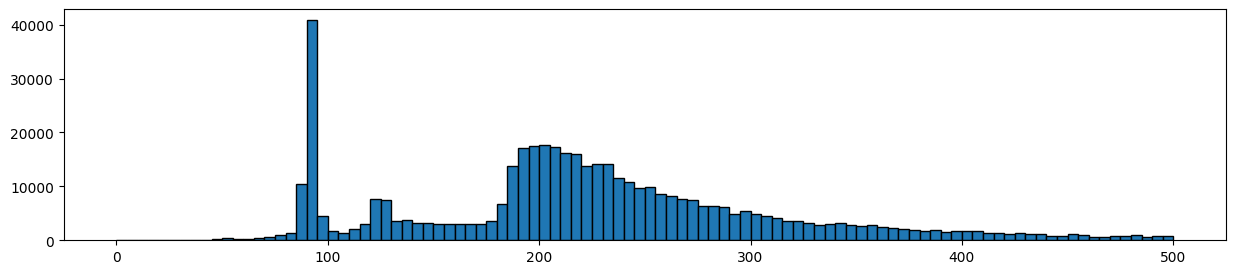

In [15]:
plt.figure(figsize=(15, 3))
plt.hist(m_values, bins=100, range=(0, 500), edgecolor='black')
plt.show()

In [16]:
data.to_csv('four_guys.csv', header=None, sep=" ", index=None)

# Generated dataset

In [17]:
gf = pd.read_csv('four_guys.csv.gen_events.csv', sep=" ", header=None, names=np.array(schemas).flatten().tolist())

In [18]:
gf.head()

,E1,p1x,p1y,p1z,E2,p2x,p2y,p2z,E3,p3x,p3y,p3z,E4,p4x,p4y,p4z
0,2639.257568,-399.186188,-408.499786,-2600.028809,1857.257812,429.001740,517.007141,1831.779907,-1286.508911,-478.360229,-411.545074,-1253.517090,-2205.259033,503.373932,414.459625,2146.567383
1,2639.286377,-399.186188,-408.499786,-2600.028809,1857.257812,429.001953,517.011963,1831.784058,-1286.508911,-478.360229,-411.545074,-1253.531128,-2205.419189,503.373932,414.459625,2146.567383
2,2638.516846,-399.186188,-408.499786,-2600.028809,1857.251221,428.993988,517.010559,1831.736694,-1286.508911,-478.360229,-411.545074,-1253.123169,-2200.722168,503.373932,414.458801,2146.567383
3,2639.288574,-399.186188,-408.499786,-2600.028809,1857.257812,429.001892,517.012268,1831.777344,-1286.508911,-478.360229,-411.545074,-1253.515991,-2205.727051,503.373932,414.459625,2146.567383
4,2639.276855,-399.186188,-408.499786,-2600.028809,1857.255737,429.001343,517.011353,1831.395386,-1286.508911,-478.360229,-411.545074,-1252.498657,-2205.713623,503.373932,414.459625,2146.567383


In [19]:
e_sum_sq_g = np.power(gf['E1'] + gf['E2'] + gf['E3'] + gf['E4'], 2)
x_sum_sq_g = np.power(gf['p1x'] + gf['p2x'] + gf['p3x'] + gf['p4x'], 2)
y_sum_sq_g = np.power(gf['p1y'] + gf['p2y'] + gf['p3y'] + gf['p4y'], 2)
z_sum_sq_g = np.power(gf['p1z'] + gf['p2z'] + gf['p3z'] + gf['p4z'], 2)
m_values_g = np.sqrt(e_sum_sq_g - x_sum_sq_g - y_sum_sq_g - z_sum_sq_g)

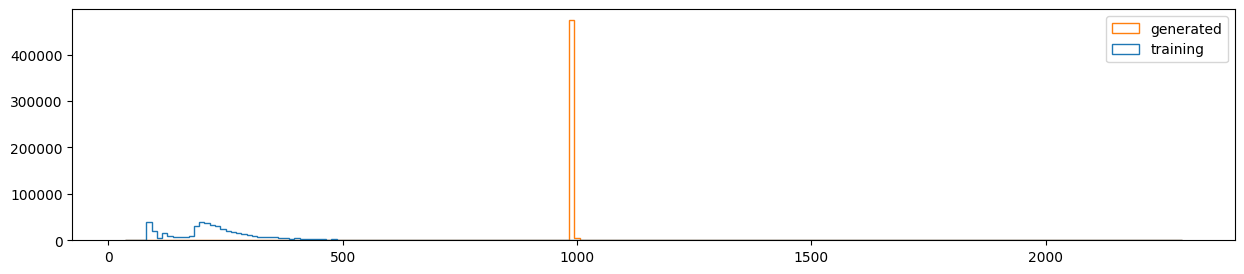

In [21]:
plt.figure(figsize=(15, 3))
plt.hist([m_values, m_values_g], bins=200, histtype='step', label=['training','generated'])
plt.legend()
plt.show()

# Training info

In [22]:
log = pd.read_csv('four_guys.csv.log')
log.head()

,epoch,loss,mse,val_loss,val_mse
0,0,0.352892,0.990530,0.001255,1.010173
1,1,0.001148,1.010076,0.001255,1.010174
2,2,0.001148,1.010078,0.001255,1.010176
3,3,0.001148,1.010080,0.001255,1.010179
4,4,0.001148,1.010084,0.001255,1.010183


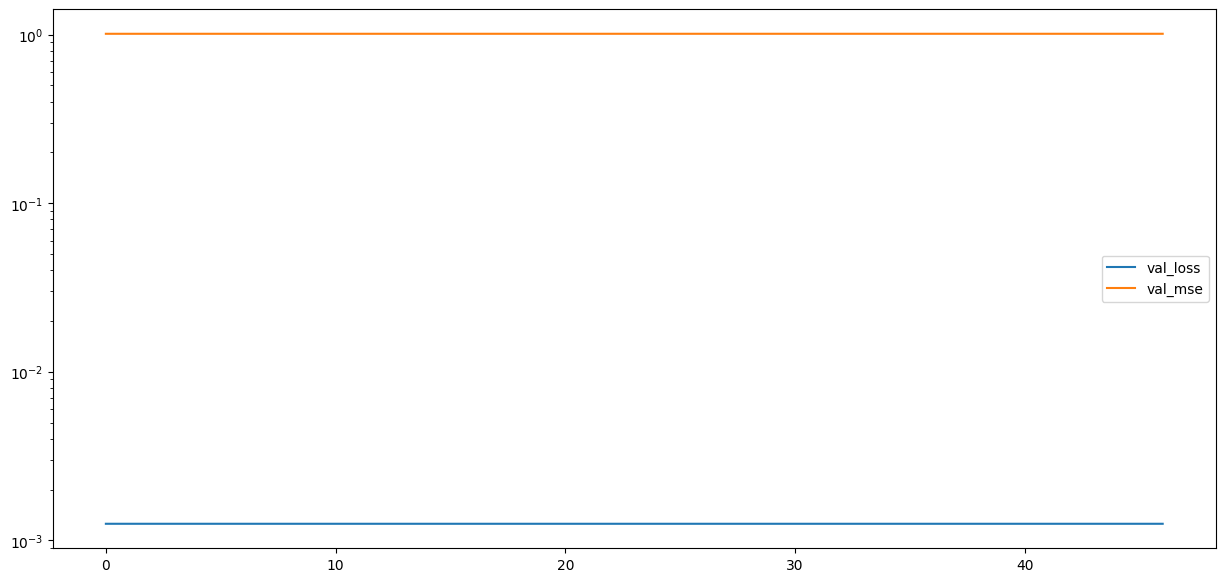

In [23]:
plt.figure(figsize=(15, 7))
plt.plot(log.index, log.val_loss, label='val_loss')
plt.plot(log.index, log.val_mse, label='val_mse')
# plt.plot(log.index, log.loss, label='loss')
# plt.plot(log.index, log.mse, label='mse')

#plt.xlim((-1, 500))
plt.yscale('log')
plt.legend()
plt.show()